# Analyse Exploratoire

### Import des modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [5]:
building_consumption = pd.read_csv('https://s3.eu-west-1.amazonaws.com/course.oc-static.com/projects/Data_Scientist_P4/2016_Building_Energy_Benchmarking.csv', delimiter=',')

In [7]:
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

### Signification des colonnes:

| Colonne | Type de données | Description |
|:--------|:----------------|:------------|
| OSEBuildingID | int | Identifiant unique du bâtiment dans le système OSE. |
| DataYear | int | Année des données collectées. |
| BuildingType | str | Type général du bâtiment (résidentiel, commercial, etc.). |
| PrimaryPropertyType | str | Type principal de propriété utilisé pour le benchmarking. |
| PropertyName | str | Nom donné à la propriété ou au bâtiment. |
| Address | str | Adresse du bâtiment. |
| City | str | Ville où est situé le bâtiment. |
| State | str | État ou province (WA pour Washington). |
| ZipCode | int | Code postal du bâtiment. |
| TaxParcelIdentificationNumber | str | Numéro fiscal du bâtiment. |
| CouncilDistrictCode | float | Code du district municipal. |
| Neighborhood | str | Quartier dans la ville de Seattle. |
| Latitude | float | Latitude géographique du bâtiment. |
| Longitude | float | Longitude géographique du bâtiment. |
| YearBuilt | int | Année de construction du bâtiment. |
| NumberofBuildings | int | Nombre de bâtiments sur la parcelle. |
| NumberofFloors | int | Nombre d'étages du bâtiment. |
| PropertyGFATotal | float | Surface totale de la propriété en pieds carrés. |
| PropertyGFAParking | float | Surface dédiée au stationnement en pieds carrés. |
| PropertyGFABuilding(s) | float | Surface construite du/des bâtiment(s) en pieds carrés. |
| ListOfAllPropertyUseTypes | str | Liste de tous les types d'usages du bâtiment. |
| LargestPropertyUseType | str | Plus grand type d'usage du bâtiment. |
| LargestPropertyUseTypeGFA | float | Surface du plus grand usage (pieds carrés). |
| SecondLargestPropertyUseType | str | Deuxième plus grand type d'usage du bâtiment. |
| SecondLargestPropertyUseTypeGFA | float | Surface du deuxième usage (pieds carrés). |
| ThirdLargestPropertyUseType | str | Troisième plus grand type d'usage du bâtiment. |
| ThirdLargestPropertyUseTypeGFA | float | Surface du troisième usage (pieds carrés). |
| YearsENERGYSTARCertified | str | Années de certification ENERGY STAR du bâtiment. |
| ENERGYSTARScore | float | Score de performance énergétique ENERGY STAR (1-100). |
| SiteEUI(kBtu/sf) | float | Intensité énergétique du site (kBtu par pied carré). |
| SiteEUIWN(kBtu/sf) | float | Intensité énergétique du site normalisée (climat/weather normalized). |
| SourceEUI(kBtu/sf) | float | Intensité énergétique source (kBtu par pied carré). |
| SourceEUIWN(kBtu/sf) | float | Intensité énergétique source normalisée. |
| SiteEnergyUse(kBtu) | float | Utilisation totale d'énergie du site (kBtu). |
| SiteEnergyUseWN(kBtu) | float | Utilisation nette du site normalisée (kBtu). |
| SteamUse(kBtu) | float | Utilisation de vapeur (kBtu). |
| Electricity(kWh) | float | Consommation d'électricité en kilowatt-heure (kWh). |
| Electricity(kBtu) | float | Consommation d'électricité convertie en kBtu. |
| NaturalGas(therms) | float | Consommation de gaz naturel en therms. |
| NaturalGas(kBtu) | float | Consommation de gaz naturel convertie en kBtu. |
| DefaultData | bool | Données par défaut utilisées (True/False). |
| Comments | str | Commentaires supplémentaires sur les données. |
| ComplianceStatus | str | Statut de conformité du bâtiment au programme de reporting énergétique. |
| Outlier | str | Statut indiquant si l'enregistrement est un outlier/anomalie. |
| TotalGHGEmissions | float | Émissions totales de gaz à effet de serre (en tonnes métriques CO2e). |
| GHGEmissionsIntensity | float | Intensité des émissions GES par surface (kgCO2e/ft²). |

#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

In [12]:
# Suppression de la colonne Comments qui ne contient aucune donnée
building_consumption.drop(['Comments'], axis=1, inplace=True)

In [14]:
# Récupération des différentes valeurs de la colonne BuildingType
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [16]:
# Ne gardons que les bâtiments non résidentiels
building_consumption = building_consumption.loc[building_consumption['BuildingType'].isin(
    ['NonResidential', 'Nonresidential COS', 'SPS-District K-12', 'Campus', 'Nonresidential WA']), : ]

In [18]:
# Récupération des différentes valeurs de la colonne Outlier
building_consumption['Outlier'].unique()

array([nan, 'High outlier', 'Low outlier'], dtype=object)

In [20]:
# Suppression des lignes qui ont des outlier
building_consumption = building_consumption[~building_consumption["Outlier"].isin(['High outlier', 'Low outlier'])]

In [22]:
# Récupération des différentes valeurs de la colonne ComplianceStatus
building_consumption['ComplianceStatus'].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [24]:
# Ne gardons que les lignes compliant
building_consumption = building_consumption[building_consumption["ComplianceStatus"] == 'Compliant']

In [26]:
# Supprimons les lignes qui n'ont pas de valeurs renseignées sur des colonnes importantes
building_consumption.dropna(subset=['SiteEnergyUseWN(kBtu)', 'LargestPropertyUseTypeGFA', 'ENERGYSTARScore'], inplace=True)

In [28]:
# Remplaçons les valeurs manquantes par 0 pour des surfaces possiblement inexistantes
building_consumption['SecondLargestPropertyUseTypeGFA'] = building_consumption['SecondLargestPropertyUseTypeGFA'].fillna(0)
building_consumption['ThirdLargestPropertyUseTypeGFA'] = building_consumption['ThirdLargestPropertyUseTypeGFA'].fillna(0)

# Modélisation 

### Import des modules 

In [32]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, make_scorer
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder
from category_encoders.binary import BinaryEncoder
from sklearn.pipeline import make_pipeline

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor

### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

In [36]:
# CODE FEATURE ENGINEERING

### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation.
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de features) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne.

In [40]:
# CODE PREPARATION DES FEATURES

In [42]:
# Création de nouvelles colonnes pour indiquer quelles sources d'énergie sont utilisées
building_consumption['SteamUsed'] = (building_consumption['SteamUse(kBtu)'] > 0).astype(int)
building_consumption['ElectricityUsed'] = (building_consumption['Electricity(kBtu)'] > 0).astype(int)
building_consumption['NaturalGasUsed'] = (building_consumption['NaturalGas(kBtu)'] > 0).astype(int)

In [44]:
# Jetons un coup d'oeil aux valeurs des colonnes catégorielles
for col in building_consumption.select_dtypes(include=['object', 'category']).columns.tolist():
    print(col, '=>', building_consumption[col].unique())

BuildingType => ['NonResidential' 'Campus' 'SPS-District K-12' 'Nonresidential COS']
PrimaryPropertyType => ['Hotel' 'Other' 'Mixed Use Property' 'K-12 School'
 'Small- and Mid-Sized Office' 'Large Office' 'Senior Care Community'
 'Medical Office' 'Retail Store' 'Hospital' 'Residence Hall' 'Warehouse'
 'Worship Facility' 'Supermarket / Grocery Store' 'Distribution Center'
 'Refrigerated Warehouse' 'Low-Rise Multifamily']
PropertyName => ['Mayflower park hotel' 'Paramount Hotel' '5673-The Westin Seattle'
 'HOTEL MAX' 'WARWICK SEATTLE HOTEL (ID8)' 'Camlin' '311wh-Pioneer Square'
 'Hotel Monaco Seattle' '5679-W Seattle' 'Executive Pacific Plaza'
 'Crowne Plaza Hotel Seattle' 'Hotel Vintage Seattle'
 'Renaissance Seattle Hotel' 'Arctic Club Seattle'
 'King County Courthouse' 'WATERTOWN HOTEL'
 'Marriott Springhill Suites (33)' 'Hotel Five' 'Silver Cloud University'
 'Plant 2 Site' 'Lawton Elementary' 'SBC52' 'El Centro de la Raza'
 'Blanchet High School' 'Seattle Hilton Hotel' '5th and Pin

In [46]:
# Supprimons les colonnes peu pertinentes (aucune valeur, IDs, data leakage, toujours la même la valeur, valeurs non structurées)
building_consumption.drop([
    'OSEBuildingID', 'DataYear', 'TaxParcelIdentificationNumber',
    'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'Electricity(kWh)', 'NaturalGas(therms)', 'DefaultData',
    'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
    'NaturalGas(kBtu)', 'GHGEmissionsIntensity', 'TotalGHGEmissions', 
    'PropertyName', 'Address', 'City', 'State', 'Outlier', 'ComplianceStatus', 'ZipCode', 'CouncilDistrictCode'
    
], axis=1, inplace=True)

In [48]:
# Encodage des colonnes catégorielles restantes
colonnes_cat = building_consumption.select_dtypes(include=['object', 'category']).columns.tolist()
# Remplacer les NaN par une catégorie explicite
building_consumption[colonnes_cat] = building_consumption[colonnes_cat].fillna('missing')
building_consumption[colonnes_cat] = building_consumption[colonnes_cat].apply(lambda col: col.str.lower())
# Initialiser l'encodeur
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
# Appliquer l'encodage
df_encoded_array = encoder.fit_transform(building_consumption[colonnes_cat])
# Convertir en DataFrame avec noms de colonnes
df_encoded = pd.DataFrame(df_encoded_array, columns=colonnes_cat, index=building_consumption.index)
# Ajouter les colonnes encodées au DataFrame original
df_final = pd.concat([building_consumption.drop(columns=colonnes_cat), df_encoded.add_suffix('_encoded')], axis=1)
# Créer le mapping (catégorie → entier)
mappings = {
    col: dict(zip(cats, range(len(cats))))
    for col, cats in zip(colonnes_cat, encoder.categories_)
}
# Afficher les mappings
#print(mappings['Neighborhood'])
#print(mappings['PrimaryPropertyType'])
# Affichage final
print("\n DataFrame final :")
df_final.info()


 DataFrame final :
<class 'pandas.core.frame.DataFrame'>
Index: 994 entries, 0 to 3347
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Latitude                              994 non-null    float64
 1   Longitude                             994 non-null    float64
 2   YearBuilt                             994 non-null    int64  
 3   NumberofBuildings                     994 non-null    float64
 4   NumberofFloors                        994 non-null    int64  
 5   PropertyGFATotal                      994 non-null    int64  
 6   PropertyGFAParking                    994 non-null    int64  
 7   PropertyGFABuilding(s)                994 non-null    int64  
 8   LargestPropertyUseTypeGFA             994 non-null    float64
 9   SecondLargestPropertyUseTypeGFA       994 non-null    float64
 10  ThirdLargestPropertyUseTypeGFA        994 non-null    float64
 11  ENE

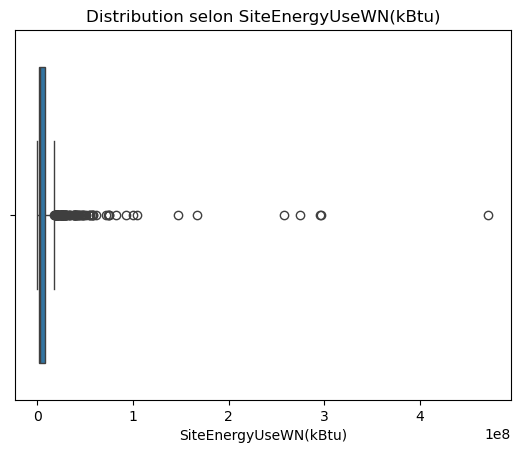

In [50]:
building_consumption = df_final
# Utilisons un boxplot pour comprendre le lien entre les features et la target
sns.boxplot(data=building_consumption, x='SiteEnergyUseWN(kBtu)')
plt.title('Distribution selon SiteEnergyUseWN(kBtu)')
plt.show()

In [52]:
# Quelles sont les colonne avec des valeurs numériques
numeric_cols = building_consumption.select_dtypes(include='number').columns
numeric_cols

Index(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)', 'SteamUsed',
       'ElectricityUsed', 'NaturalGasUsed', 'BuildingType_encoded',
       'PrimaryPropertyType_encoded', 'Neighborhood_encoded',
       'ListOfAllPropertyUseTypes_encoded', 'LargestPropertyUseType_encoded',
       'SecondLargestPropertyUseType_encoded',
       'ThirdLargestPropertyUseType_encoded',
       'YearsENERGYSTARCertified_encoded'],
      dtype='object')

In [54]:
# SUPPRESSION DES OUTLIERS
# Sélection des colonnes numériques pouvant présenter des outliers
numeric_cols = [
        'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUseWN(kBtu)'
]

# Fonction IQR pour supprimer les outliers sur une colonne
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Appliquer l'IQR successivement à chaque colonne numérique
building_consumption_filtered = building_consumption.copy()
for col in numeric_cols:
    building_consumption_filtered = remove_outliers_iqr(building_consumption_filtered, col)

# Résultat
print(f"Forme initiale : {building_consumption.shape}")
print(f"Forme après suppression des outliers : {building_consumption_filtered.shape}")
building_consumption = building_consumption_filtered

Forme initiale : (994, 24)
Forme après suppression des outliers : (376, 24)


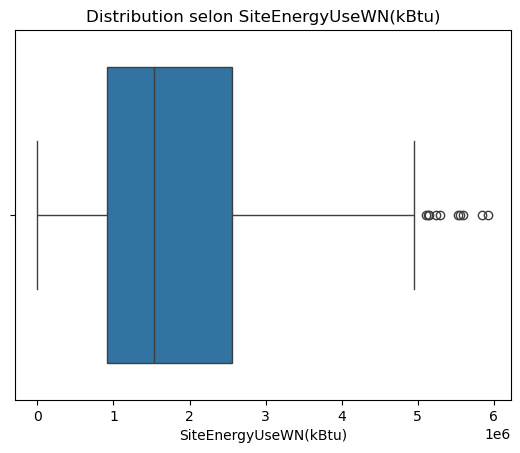

In [56]:
# Revoyons la distribution
sns.boxplot(data=building_consumption, x='SiteEnergyUseWN(kBtu)')
plt.title('Distribution selon SiteEnergyUseWN(kBtu)')
plt.show()

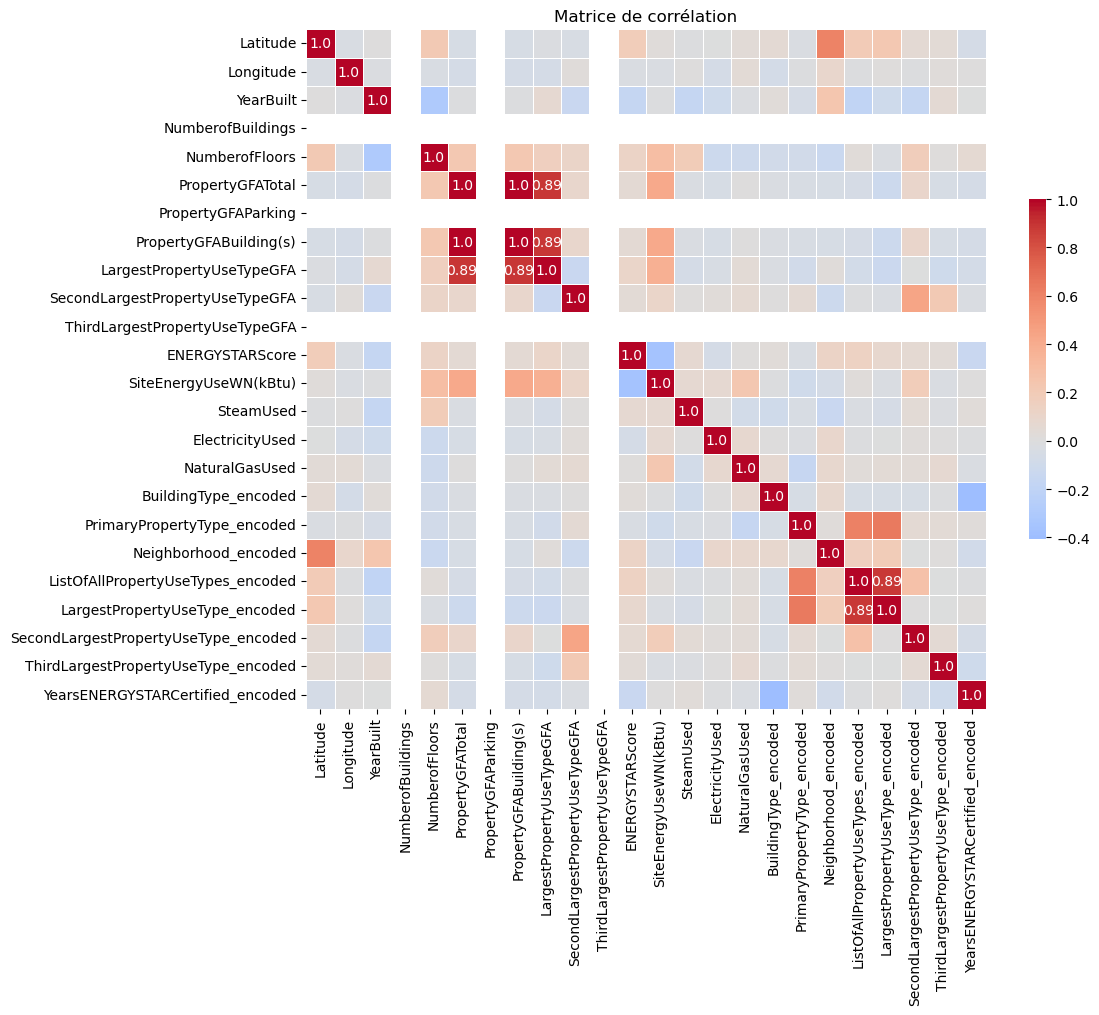

In [58]:
# Matrice de corrélation avec des annotations pour voir les valeurs > 0.7
corr = building_consumption.corr(numeric_only=True)

# Création d'un masque d'annotations : True si |corr| > 0.7
annot_mask = corr.abs() > 0.7

# Création de la matrice annotée uniquement pour les corrélations fortes
annot = corr.where(annot_mask).round(2).astype(str)
annot[~annot_mask] = ""  # Remplace les autres valeurs par chaîne vide

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

In [60]:
# Faisons le tri dans les colonnes trop corrélées (>= 0,7) ou non pertinentes (mêmes valeurs ou manquantes)
building_consumption.drop(['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'NumberofBuildings', 'ListOfAllPropertyUseTypes_encoded', 'ThirdLargestPropertyUseTypeGFA'], axis=1, inplace=True)

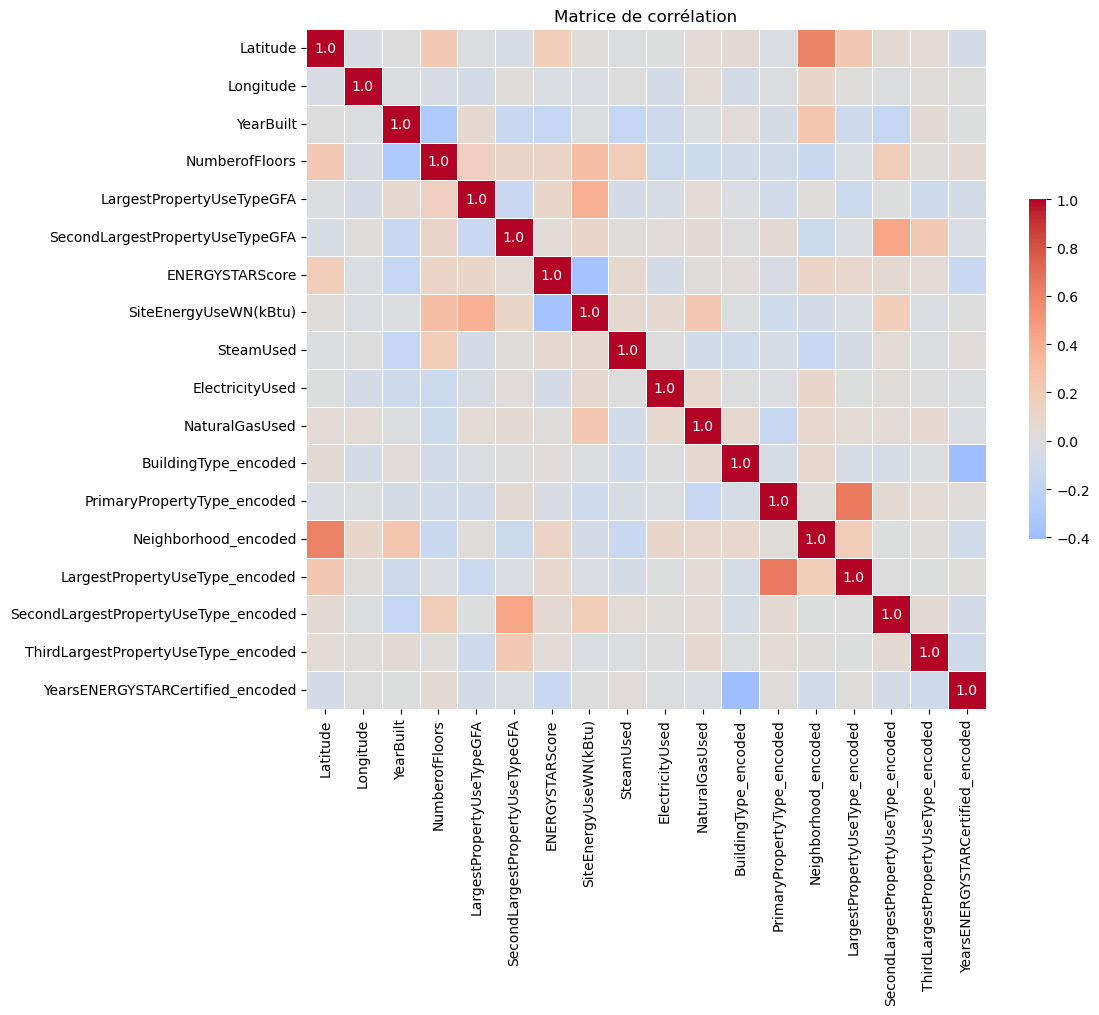

In [62]:
# Matrice de corrélation avec des annotations pour voir les valeurs > 0.7
corr = building_consumption.corr(numeric_only=True)

# Création d'un masque d'annotations : True si |corr| > 0.7
annot_mask = corr.abs() > 0.7

# Création de la matrice annotée uniquement pour les corrélations fortes
annot = corr.where(annot_mask).round(2).astype(str)
annot[~annot_mask] = ""  # Remplace les autres valeurs par chaîne vide

plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5}
)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

In [64]:
# Séparation du jeu de données, X (ensemble de features) et y (TotalGHGEmissions)
X = building_consumption.drop(columns=['SiteEnergyUseWN(kBtu)'])
y = building_consumption['SiteEnergyUseWN(kBtu)']

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [68]:
# CODE COMPARAISON DES MODELES

In [70]:
# Séparation train/test
random_state=42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

In [72]:
# Définition des "folds"
cv=10

In [74]:
def compute_score(model_name, model, X, y):
    """ Calcul le score d'un modèle
    """
    # Définition des métriques personnalisées
    scoring = {
        'r2': 'r2',
        'mae': 'neg_mean_absolute_error',
        'rmse': make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))
    }
    
    # Validation croisée
    cv_results = cross_validate(model, X, y, cv=cv, scoring=scoring)
    
    # Affichage
    results_df = pd.DataFrame({
        'R2': cv_results['test_r2'],
        'MAE': -cv_results['test_mae'],
        'RMSE': -cv_results['test_rmse']
    })
    print(f"\nMoyennes modèle {model_name} :")
    print(results_df.mean())# Modèle linéaire

# Modèle linéaire
compute_score("Linear", LinearRegression(), X, y)
# Modèle à base d'arbres
compute_score("Random Forest", RandomForestRegressor(n_estimators=100, random_state=random_state), X, y)
# Modèle de type SVM
compute_score("SVM", make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), X, y)
# Modèle de type Boosting
compute_score("Hist Gradient Boosting", HistGradientBoostingRegressor(random_state=random_state), X, y)


Moyennes modèle Linear :
R2           0.389417
MAE     672571.273273
RMSE    900788.150500
dtype: float64

Moyennes modèle Random Forest :
R2           0.454910
MAE     621774.103888
RMSE    844660.043894
dtype: float64

Moyennes modèle SVM :
R2     -1.619381e-01
MAE     9.563506e+05
RMSE    1.254318e+06
dtype: float64

Moyennes modèle Hist Gradient Boosting :
R2           0.513066
MAE     579614.109233
RMSE    798006.726642
dtype: float64


### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn. 

In [78]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE

In [80]:
# Le meilleur modèle semble être HistGradientBoostingRegressor 
model = HistGradientBoostingRegressor(random_state=random_state)

param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_iter': [100, 300, 500],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [20, 50, 100]
}

# Scorer personnalisé pour RMSE (car sklearn veut maximiser les scores, donc on met le "-" pour minimiser)
rmse_scorer = make_scorer(lambda y_true, y_pred: -np.sqrt(mean_squared_error(y_true, y_pred)))

# GridSearchCV
grid = GridSearchCV(estimator=model,
                    param_grid=param_grid,
                    scoring=rmse_scorer,  # peut aussi être 'neg_mean_squared_error', 'r2', etc.
                    cv=cv,
                    n_jobs=-1)

# Recherche
grid.fit(X_train, y_train)

# Meilleurs hyperparamètres
print("Meilleurs paramètres :", grid.best_params_)

# Évaluation finale sur le jeu de test
from sklearn.metrics import r2_score, mean_absolute_error

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("R² :", r2_score(y_test, y_pred))
print("MAE :", mean_absolute_error(y_test, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred)))

Meilleurs paramètres : {'learning_rate': 0.01, 'max_depth': None, 'max_iter': 500, 'min_samples_leaf': 20}
R² : 0.5474474469442342
MAE : 606229.9598280328
RMSE : 871284.8586346452


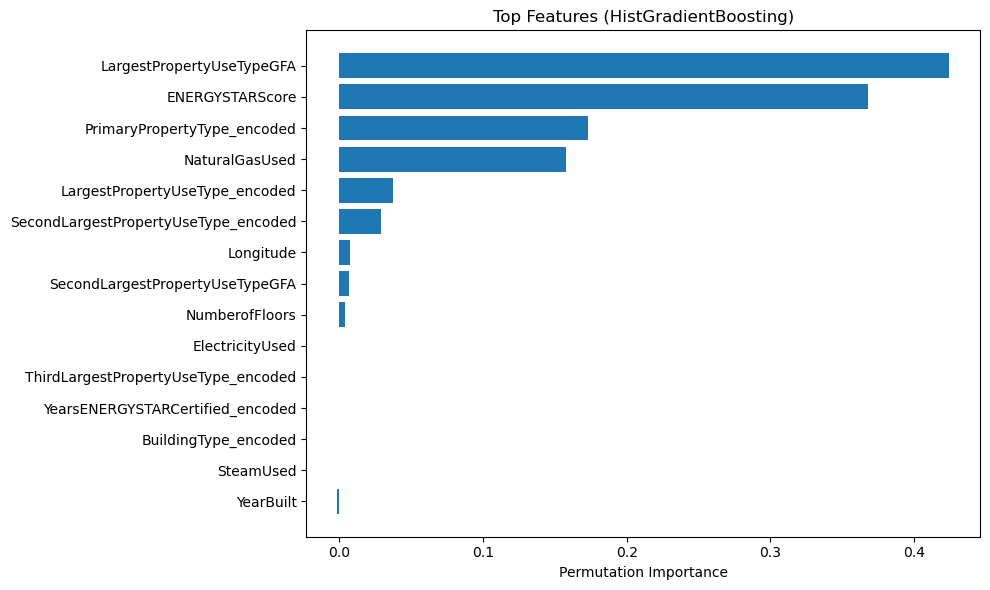

In [81]:
# Influence des features
model = HistGradientBoostingRegressor(random_state=random_state, learning_rate=0.01, max_depth= None, max_iter=500, min_samples_leaf=20)
model.fit(X_train, y_train)

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=random_state)

# Création d'un dataframe permettant l'affichage
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance_mean': result.importances_mean,
    'importance_std': result.importances_std
}).sort_values(by='importance_mean', ascending=False)

top_n = 15
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'][:top_n][::-1], importance_df['importance_mean'][:top_n][::-1])
plt.xlabel("Permutation Importance")
plt.title("Top Features (HistGradientBoosting)")
plt.tight_layout()
plt.show()

In [82]:
# Sélection des 9 meilleures features selon f_regression
from sklearn.feature_selection import SelectKBest, f_regression

X = building_consumption.drop(columns=['SiteEnergyUseWN(kBtu)'])
y = building_consumption['SiteEnergyUseWN(kBtu)']

selector = SelectKBest(score_func=f_regression, k=9)
X_new = selector.fit_transform(X, y)

# Pour voir les colonnes sélectionnées :
selected_mask = selector.get_support()
selected_features = X.columns[selected_mask]
print(selected_features)

Index(['NumberofFloors', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SteamUsed',
       'NaturalGasUsed', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded',
       'SecondLargestPropertyUseType_encoded'],
      dtype='object')


In [83]:
# On refait un jeu de données avec 8 colonnes sélectionnées (assez simple à utiliser pour l'utilisateur)
api_selected_features = [
    'NumberofFloors', 'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SteamUsed',
    'NaturalGasUsed', 'PrimaryPropertyType_encoded', 'Neighborhood_encoded'
]
X = building_consumption.loc[ : , api_selected_features]
y = building_consumption['SiteEnergyUseWN(kBtu)']

# Séparation train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

# Pipeline : scaler + modèle
# HistGradientBoostingRegressor n'a pas besoin de normalisation (mise à l'échelle des valeurs)
#  mais on peut le conserver pour exemple
pipeline = make_pipeline(
    StandardScaler(),
    HistGradientBoostingRegressor(random_state=random_state,
                                  learning_rate=0.01, max_depth= None, max_iter=500, min_samples_leaf=20)
)

# Entraînement
pipeline.fit(X_train, y_train)

# Prédictions
y_pred = pipeline.predict(X_test)

# Évaluation
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"R² : {r2:.3f}")
print(f"MAE: {mae:.2f} kBtu")

R² : 0.559
MAE: 564029.82 kBtu


In [84]:
# Sauvegarde avec BentoML
import bentoml
bentoml.sklearn.save_model("rf_pipeline_model", pipeline)

Model(tag="rf_pipeline_model:g6ftplewfo7qwzre", path="/Users/nicolas/bentoml/models/rf_pipeline_model/g6ftplewfo7qwzre/")

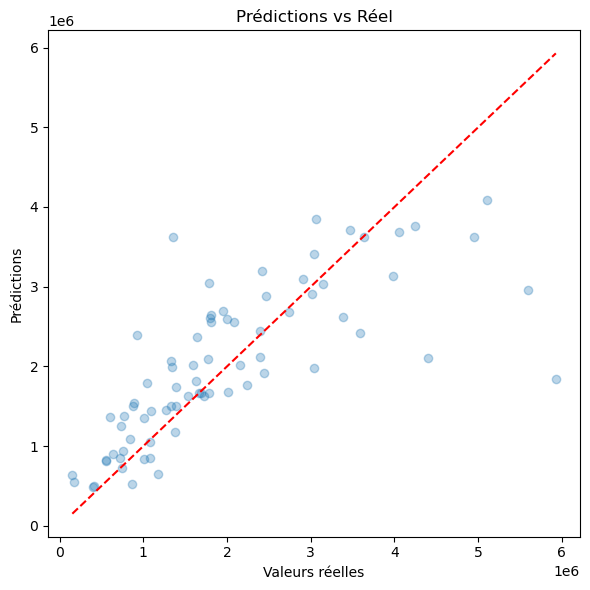

In [85]:
# Réel vs Prédiction
# Si les points s’alignent bien sur la diagonale → bonne prédiction
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonale
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Réel")
plt.tight_layout()
plt.show()

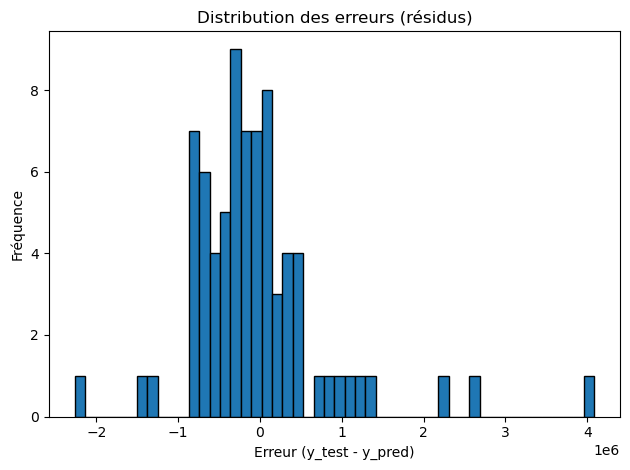

In [87]:
# Histogramme des résidus
# Une bonne distribution doit être centrée autour de zéro et pas trop asymétrique
errors = y_test - y_pred
plt.hist(errors, bins=50, edgecolor='k')
plt.title("Distribution des erreurs (résidus)")
plt.xlabel("Erreur (y_test - y_pred)")
plt.ylabel("Fréquence")
plt.tight_layout()
plt.show()